# Project #3
## Foundations of Machine Learning

The purpose of this project is to build models to predict the outcome of the 2024 presidential election in Virginia and provide quantitative information about the precision of the prediction.
  
The data include:
  
  - `voting_VA.csv`: Voting data for presidential elections for Virginia from 2000 to 2020
  - `nhgis_county_data`: A folder containing many county-level summary stats for every county in the U.S. This is the most complete county-level data I could find. If you go to the IPUMS NHGIS web site, you can see what else is available (there are hundreds of variables, and I chose a large number of obvious ones; perhaps some useful ones escaped my attention). For standard IPUMS microdata, the county is not available for privacy reasons.
  - `county_adjacencies.csv`: I looked up the neighbors, districts, FIPS county identifiers, and populations in 2022 for all counties and cities in Virginia.
  - At [https://vgin.vdem.virginia.gov/datasets/777890ecdb634d18a02eec604db522c6/about] there is a shapefile for making choropleth plots called "Shapefile Download (Clipped to VIMS shoreline)"
  -  I put together a starter notebook called `va_voting.ipynb` that shows how to combine these files and make nice maps

You can use whatever additional data you want to create a predictive algorithm for outcomes, based on the `voting_VA.csv` and `nhgis_county_data` data or other sources you think would be useful. You can focus on Virginia data, but in principle, you could use data from the entire country. Since you only have five observations for each county on its own in Virginia, you can, in principle, use the additional data about county composition or data from other states to build richer and more powerful predictive models than just the sample average for each county (e.g 3 observations of `D` winning and 2 of `R` winning implies a probability 3/5 of `D` winning). You could also gather and use data about past candidates to see if there are county-candidate interaction effects that improve your model's performance. Indeed, 2024 might be a Biden-Trump rematch, in which case past data might be extremely relevant.
    
## Paper format

The format of the paper should be:

- Summary: A one paragraph description of the question, methods, and results (about 350 words).
- Data: One to two pages discussing the data and key variables, and any challenges in reading, cleaning, and preparing them for analysis.
- Results: Two to five pages providing visualizations, statistics, tables, a discussion of your methodology, and a presentation of your main results. In particular, how are you approaching the prediction problem? How confident are you about your assessments that counties will support one party or the other?
- Conclusion: One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project.
- Appendix: If you have a significant number of additional plots or table that you feel are essential to the project, you can put any amount of extra content at the end and reference it from the body of the paper.

Submit your work in your group's GitHub repo.

## Group Work and Submission

Each group will submit their work in a GitHub repo. The repo can be managed by a group member or arranged by github.com/DS3001.

Half of each student's grade is based on their commits to the repo. Each student is expected to do something
specific that contributes to the overall project outcome. Since commits are recorded explicitly by Git/GitHub,
this is observable. A student can contribute by cleaning data, creating visualizations, or writing about results,
but everyone has to do something substantial. A student's work doesn't need to make it into the final report
to be valuable and substantial, and fulfill the requirement to make a contribution to the project.

The other half of each student's grade is based on the report. Groups will work together on combining
results and writing up findings in a Jupyter notebook, using code chunks to execute Python commands and
markdown chunks to structure the paper and provide exposition. The notebook should run on Colab or
Rivana from beginning to end without any errors.

## Criteria

The project is graded based on four criteria:

- Project Concept: What is the strategy for building and testing the group's predictive models? How are the models embedded in the decision problem of gerrymandering Virginia?  
- Wrangling, EDA, and Visualization: How are are missing values handled? For variables with large numbers of missing values, to what extent do the data and documentation provide an explanation for the missing data? If multiple data sources are used, how are the data merged? For the main variables in the analysis, are the relevant data summarized and visualized through a histogram or kernel density plot where appropriate? Are basic quantitative features of the data addressed and explained? How are outliers characterized and addressed?
- Analysis: What are the groups' main findings? Do the tables, plots, and statistics support the conclusions? If the gerrymandering strategy succeeds, what are the results and how extreme can the map be drawn for each side? If the gerrymandering strategy fails, is there a thoughtful discussion about the challenges and limitations?
- Replication/Documentation: Is the code appropriately commented? Can the main results be replicated from the code and original data files? Are significant choices noted and explained?

Each of the four criteria are equally weighted (25 points out of 100).


# EDA

In [1]:
!git clone https://github.com/DS3001/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 70 (delta 5), reused 3 (delta 3), pack-reused 62
Receiving objects: 100% (70/70), 31.37 MiB | 8.34 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Updating files: 100% (41/41), done.


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# read in csv files

voting_VA = pd.read_csv("./project_voting/data/voting_VA.csv")
county_adjacencies = pd.read_csv("./project_voting/data/county_adjacencies.csv")

In [4]:
voting_VA

# Dropping the following:
# Unamed: 0, state, state_po, version

cleaned_voting_VA = voting_VA.drop(columns=['Unnamed: 0', 'state', 'state_po', 'version'])

In [5]:
cleaned_voting_VA

,year,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,mode
0,2000,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,TOTAL
1,2000,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,TOTAL
2,2000,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,TOTAL
3,2000,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,TOTAL
4,2000,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,TOTAL
...,...,...,...,...,...,...,...,...,...
3731,2020,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,24,12113,ELECTION DAY
3732,2020,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,0,12113,PROVISIONAL
3733,2020,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2825,12113,ABSENTEE
3734,2020,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,ELECTION DAY


In [6]:
county_adjacencies

,County,Population2022,FIPS,District,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,Accomack,33191,51001,2,Northumberland,Lancaster,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albemarle,114534,51003,5,CharlottesvilleCity,Nelson,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,AlexandriaCity,155525,51510,8,Fairfax,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alleghany,14835,51005,6,Craig,Bath,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amelia,13455,51007,5,PrinceEdward,Cumberland,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,WinchesterCity,27936,51840,6,Frederick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,Wise,35421,51195,9,Lee,Scott,Dickenson,NortonCity,Russell,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,Wythe,28111,51197,9,Bland,Smyth,Grayson,Carroll,Pulaski,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,York,71341,51199,1,Gloucester,JamesCty,WilliamsburgCity,NewportNewsCity,PoquosonCity,HamptonCity,Northampton,NaN,NaN,NaN,NaN,NaN


In [7]:
print(voting_VA.shape)
print(voting_VA.info())
voting_VA.describe()

(3736, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736 entries, 0 to 3735
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3736 non-null   int64 
 1   year            3736 non-null   int64 
 2   state           3736 non-null   object
 3   state_po        3736 non-null   object
 4   county_name     3736 non-null   object
 5   county_fips     3736 non-null   int64 
 6   office          3736 non-null   object
 7   candidate       3736 non-null   object
 8   party           3736 non-null   object
 9   candidatevotes  3736 non-null   int64 
 10  totalvotes      3736 non-null   int64 
 11  version         3736 non-null   int64 
 12  mode            3736 non-null   object
dtypes: int64(6), object(7)
memory usage: 379.6+ KB
None


,Unnamed: 0,year,county_fips,candidatevotes,totalvotes,version
count,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.0
mean,47061.027837,2012.826552,51264.579229,5878.282120,29116.353587,20220315.0
std,23219.785408,7.589036,270.546458,18452.435802,58562.057257,0.0
min,11161.000000,2000.000000,51001.000000,0.000000,0.000000,20220315.0
25%,21235.750000,2004.000000,51069.000000,59.000000,6741.500000,20220315.0
50%,49016.500000,2016.000000,51139.000000,899.000000,11629.000000,20220315.0
75%,71036.250000,2020.000000,51550.000000,4548.250000,24520.750000,20220315.0
max,71970.000000,2020.000000,51840.000000,355133.000000,601243.000000,20220315.0


In [8]:
print(county_adjacencies.shape)
print(county_adjacencies.info())
county_adjacencies.describe()

(133, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   County          133 non-null    object
 1   Population2022  133 non-null    int64 
 2   FIPS            133 non-null    int64 
 3   District        133 non-null    int64 
 4   N1              133 non-null    object
 5   N2              119 non-null    object
 6   N3              104 non-null    object
 7   N4              99 non-null     object
 8   N5              83 non-null     object
 9   N6              59 non-null     object
 10  N7              33 non-null     object
 11  N8              17 non-null     object
 12  N9              10 non-null     object
 13  N10             4 non-null      object
 14  N11             1 non-null      object
 15  N12             1 non-null      object
dtypes: int64(3), object(13)
memory usage: 16.8+ KB
None


,Population2022,FIPS,District
count,1.330000e+02,133.000000,133.000000
mean,6.529045e+04,51263.992481,5.684211
std,1.280884e+05,271.883038,2.788962
min,2.301000e+03,51001.000000,1.000000
25%,1.465200e+04,51069.000000,4.000000
50%,2.610900e+04,51139.000000,6.000000
75%,5.438100e+04,51550.000000,9.000000
max,1.138331e+06,51840.000000,11.000000


In [9]:
print('Missing voting_VA Values')
print(voting_VA.isnull().sum(), '\n')

print('Missing County_adjacencies Values')
print(county_adjacencies.isnull().sum())

Missing voting_VA Values
Unnamed: 0        0
year              0
state             0
state_po          0
county_name       0
county_fips       0
office            0
candidate         0
party             0
candidatevotes    0
totalvotes        0
version           0
mode              0
dtype: int64 

Missing County_adjacencies Values
County              0
Population2022      0
FIPS                0
District            0
N1                  0
N2                 14
N3                 29
N4                 34
N5                 50
N6                 74
N7                100
N8                116
N9                123
N10               129
N11               132
N12               132
dtype: int64


## Need to figure out how to deal with null values for county_adjacencies. Maybe some sort of encoding?

In [18]:
# Fill missing values with a placeholder
one_hot_encoding = county_adjacencies.copy()
one_hot_encoding.fillna("None", inplace=True)

# One-hot encode the N columns
df_encoded = pd.get_dummies(one_hot_encoding, columns=['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12'])

# Display the encoded dataframe
df_encoded

,County,Population2022,FIPS,District,N1_Accomack,N1_Albemarle,N1_Alleghany,N1_Amelia,N1_Amherst,N1_Appomattox,...,N9_VirginiaBeachCity,N10_HamptonCity,N10_Henrico,N10_KingWilliam,N10_Nelson,N10_None,N11_Gloucester,N11_None,N12_None,N12_York
0,Accomack,33191,51001,2,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
1,Albemarle,114534,51003,5,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
2,AlexandriaCity,155525,51510,8,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
3,Alleghany,14835,51005,6,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
4,Amelia,13455,51007,5,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,WinchesterCity,27936,51840,6,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
129,Wise,35421,51195,9,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
130,Wythe,28111,51197,9,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
131,York,71341,51199,1,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False


In [ ]:
print(voting_VA['county_name'].value_counts(), '\n')
print(voting_VA['party'].value_counts(), '\n')
print(voting_VA['candidate'].value_counts(), '\n')

county_name
FAIRFAX              44
RICHMOND             44
ROANOKE              44
FRANKLIN             44
BEDFORD              44
                     ..
GALAX CITY           12
HAMPTON CITY         12
HARRISONBURG CITY    12
WINCHESTER CITY      12
NORTON CITY           8
Name: count, Length: 167, dtype: int64 

party
DEMOCRAT       1068
REPUBLICAN     1068
OTHER          1068
LIBERTARIAN     398
GREEN           134
Name: count, dtype: int64 

candidate
OTHER                1068
JOSEPH R BIDEN JR     398
JO JORGENSEN          398
DONALD J TRUMP        398
GEORGE W. BUSH        268
BARACK OBAMA          268
AL GORE               134
RALPH NADER           134
JOHN KERRY            134
JOHN MCCAIN           134
MITT ROMNEY           134
HILLARY CLINTON       134
DONALD TRUMP          134
Name: count, dtype: int64 



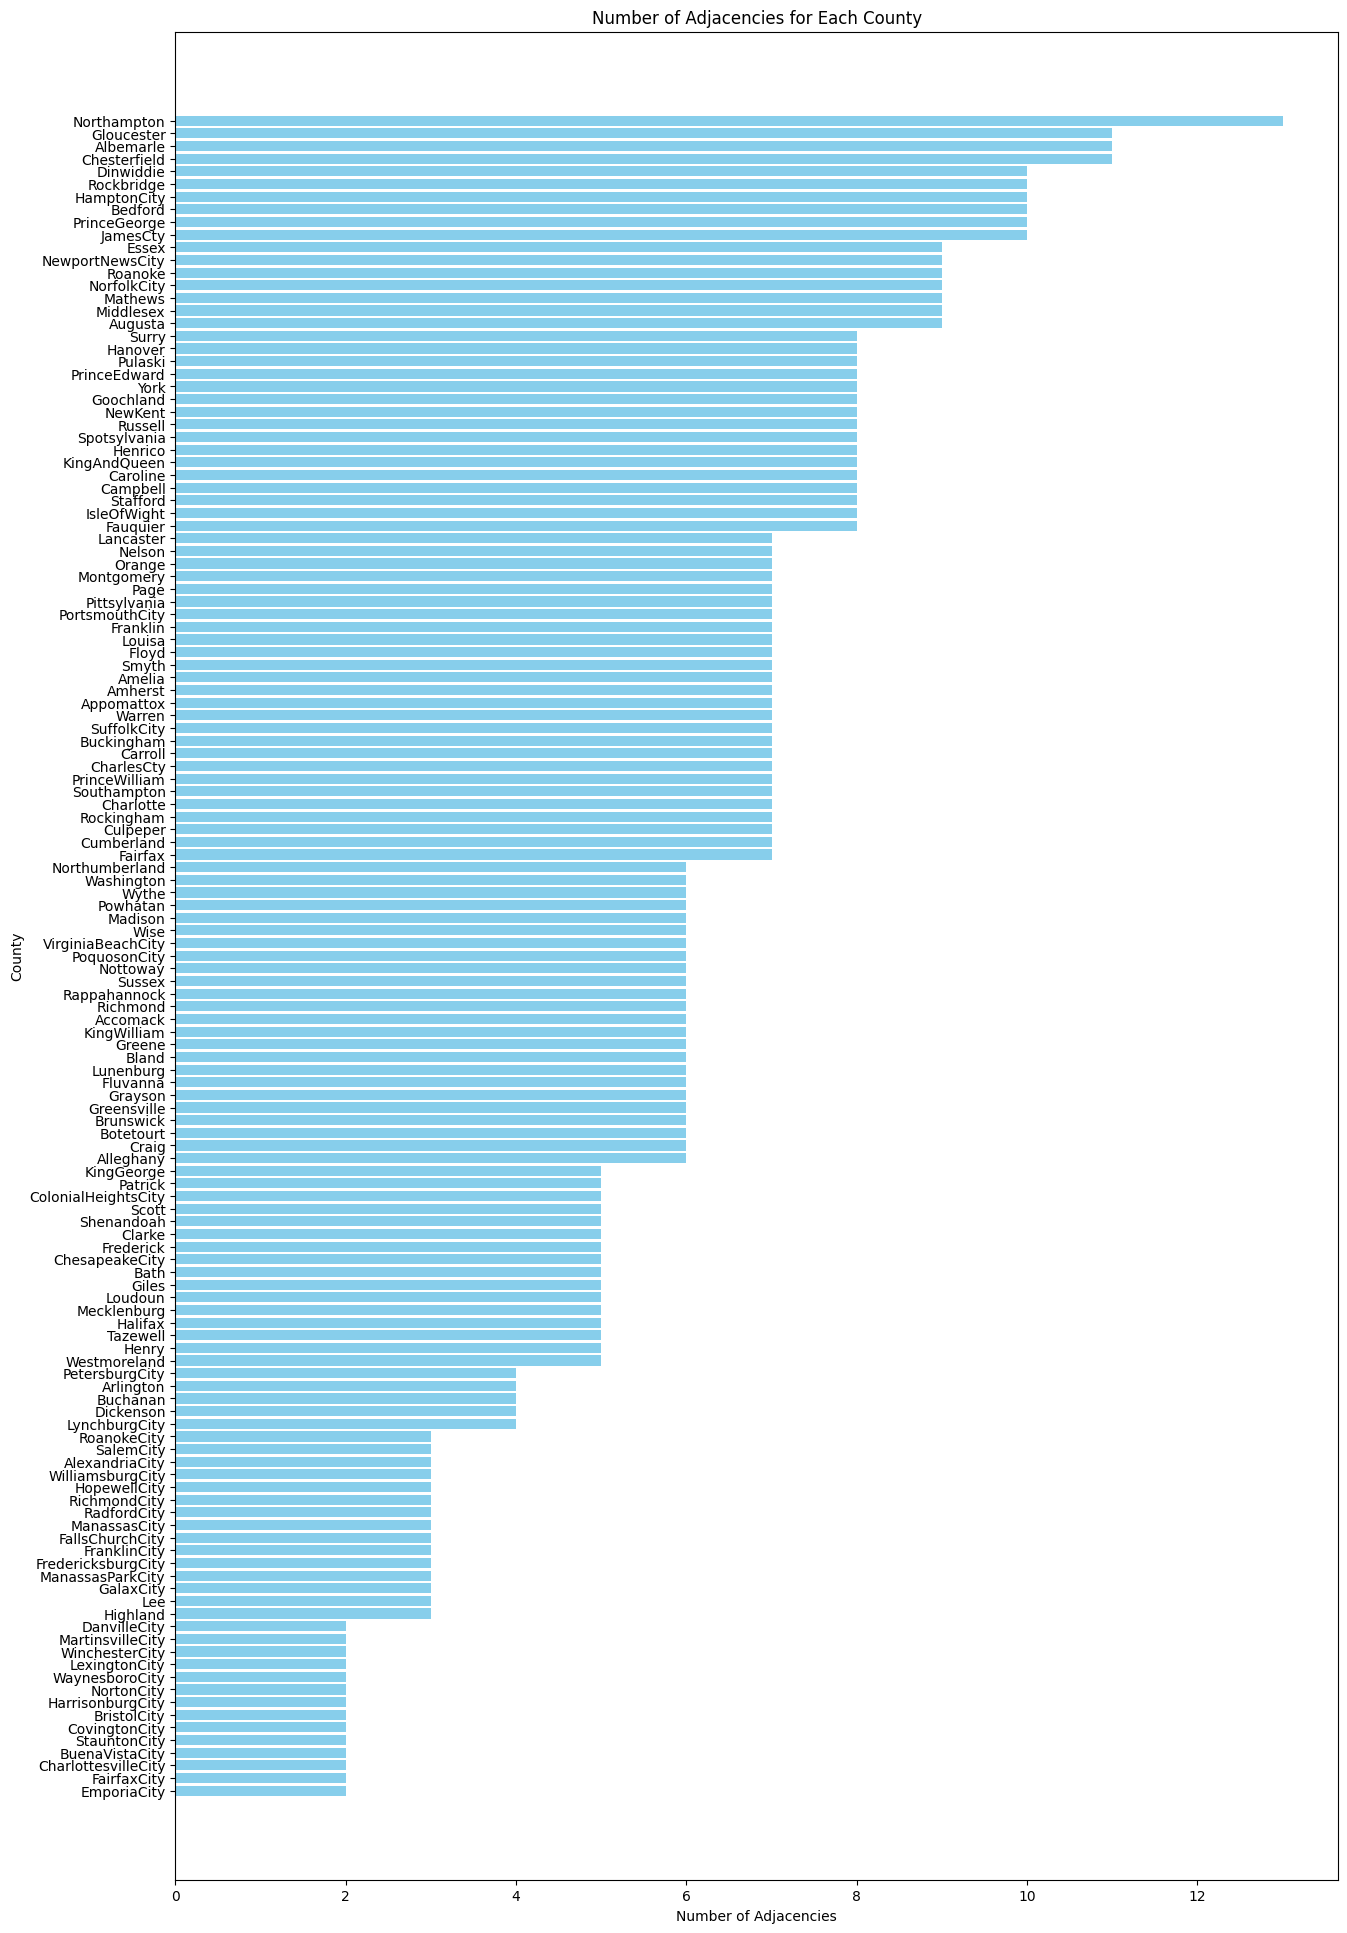

In [53]:
# Calculating adjacency count
adjacency_count = county_adjacencies.iloc[:, 4:].notna().sum(axis=1)
county_adjacencies['AdjacencyCount'] = adjacency_count

# Sorting the DataFrame by adjacency count
df_sorted = county_adjacencies.sort_values(by='AdjacencyCount', ascending=False)

plt.figure(figsize=(15, 24))
plt.barh(df_sorted['County'], df_sorted['AdjacencyCount'], color='skyblue')
plt.xlabel('Number of Adjacencies')
plt.ylabel('County')
plt.title('Number of Adjacencies for Each County')
plt.gca().invert_yaxis()
plt.show()

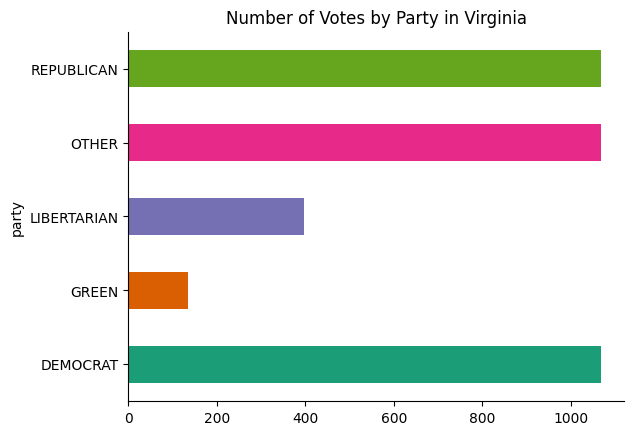

In [ ]:
# Votes by Party
cleaned_voting_VA.groupby('party').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Number of Votes by Party in Virginia')
plt.show()

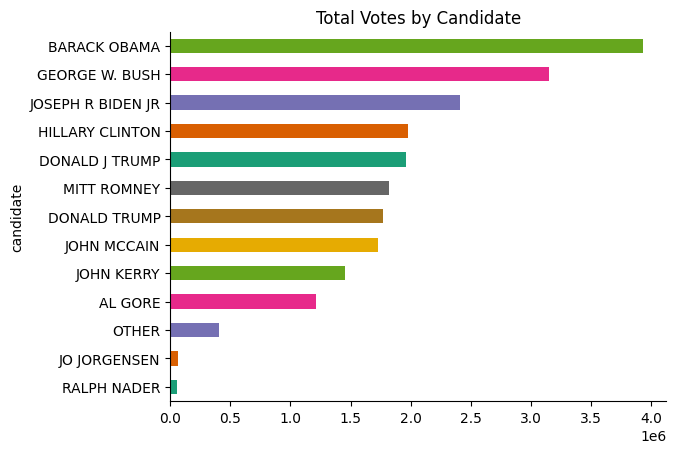

In [ ]:
# Total Votes by Candidate
cleaned_voting_VA.groupby('candidate')['candidatevotes'].sum().sort_values().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Total Votes by Candidate')
plt.show()


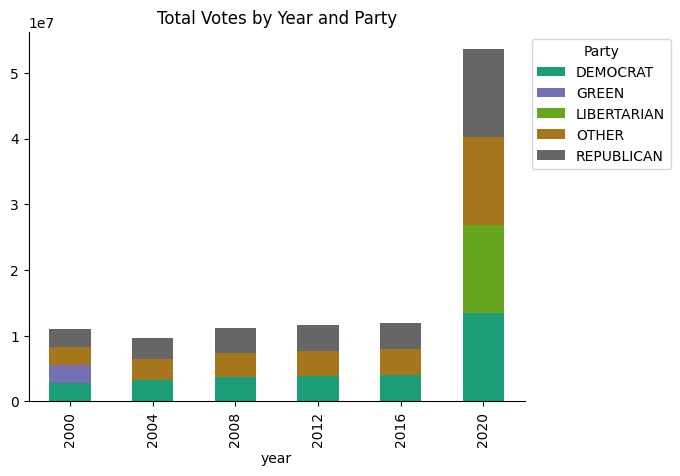

In [ ]:
# Total Votes by Year and Party
votes_year_party = cleaned_voting_VA.groupby(['year', 'party'])['totalvotes'].sum().unstack()
votes_year_party.plot(kind='bar', stacked=True, colormap='Dark2')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Total Votes by Year and Party')
plt.legend(title='Party', bbox_to_anchor=(1, 1))
plt.show()


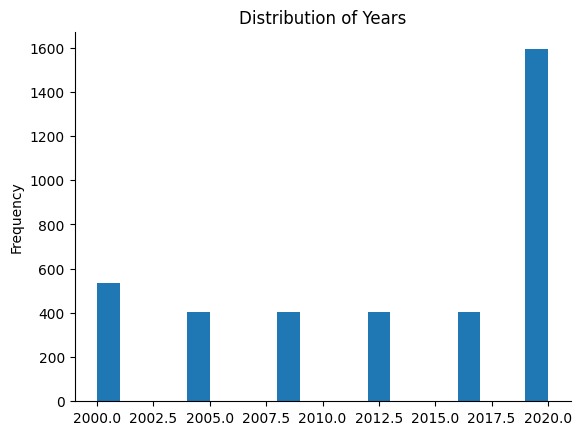

In [ ]:
# Distribution of Votes Over the Years
cleaned_voting_VA['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Distribution of Years')
plt.show()

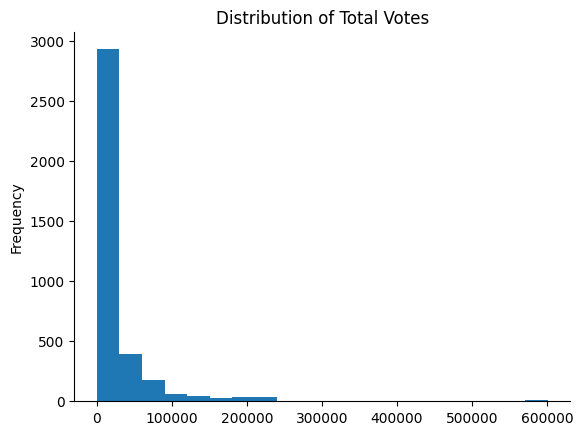

In [ ]:
# Distribution of Total Votes
cleaned_voting_VA['totalvotes'].plot(kind='hist', bins=20, title='totalvotes')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Distribution of Total Votes')
plt.show()